<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. These are age, gender, health problems like diabetes, hypertension, alchoholism and number of handicaps the patients have. There is also information about the day the patient set up their appointment - ScheduledDay, the day patient called or registered the appointment - AppointmentDay, where the appointment takes place - Neighbourhood, whether or not the patient is enrolled in Brasilian welfare program Bolsa Família - Scholarship, whether or not the patient recieved an SMS as a reminder - SMS_recieved.
I consider No-show as a dependent variable which provides the information about whether the patient showed up or not showed up the appointment. Age, Gender, Scholarship, Handicap, Diabetes, Hypertension, Alchoholism, SMS_received are the independent variables I use in this analysis.

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
df = pd.read_csv('noshow-appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check for duplicates
df.duplicated().sum()

0

### Data Cleaning
- Fix typos in column names (AppointmentID, Hipertension, Handcap, No-show).
- Correct data types of the columns *PatientId*, *AppointmentID*,  *ScheduledDay*, *AppointmentDay*.
- Extract only date from the columns *ScheduledDay* and *AppointmentDay*, exclude time.
- Remove outliers in the *Age* column. 
- Find the time between AppointmentDay and ScheduledDay and create *Time_Difference* column.
- Change 'Yes' as 1 and 'No' as 0 in the *No_show* column. 0 if the patient showed up to their appointment, and 1 if they did not show up.
- Create a column *WeekDay* where Monday is 1 and Sunday is 7.
- Find the time between AppointmentDay and ScheduledDay and create *Time_Difference* column.

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### Fix typos in column names.

In [8]:
df.rename(columns = {'AppointmentID':'AppointmentId',
                     'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap',
                     'No-show': 'No_show'}, inplace = True)
print(df.columns)

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


#### Correct data types of the columns *PatientId*, *AppointmentID*,  *ScheduledDay*, *AppointmentDay*.

In [9]:
df['PatientId'] = df['PatientId'].astype(str).replace('\.0', '', regex=True)
df['AppointmentId'] = df['AppointmentId'].astype(str)
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
df.query(' PatientId == 92298979779117')


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


#### Extract only date, exclude time.

In [11]:
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%d-%m-%Y')) 
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%d-%m-%Y'))

#### Convert them to datetime again.

In [12]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentId     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 11.8+ MB


In [14]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Check for erroneous data

In [15]:
print('Gender:',df.Gender.unique())
print('Age:',sorted(df.Age.unique()))
print('Scholarship:',df.Scholarship.unique())
print('Hypertension:',df.Hypertension.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Handicap:',df.Handicap.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Gender: ['F' 'M']
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship: [0 1]
Hypertension: [1 0]
Diabetes: [0 1]
Alcoholism: [0 1]
Handicap: [0 1 2 3 4]
SMS_received: [0 1]
No_show: ['No' 'Yes']


#### Remove outliers in the *Age* column. 

In [16]:
df = df[(df.Age >= 0) & (df.Age <= 95)]
print('Age:',sorted(df.Age.unique()))

Age: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]


#### Change 'Yes' as 1 and 'No' as 0 in the *No_show* column. 0 if the patient showed up to their appointment, and 1 if they did not show up.

In [17]:
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})

#### Create a column *WeekDay* by using the function  `isoweekday()` which returns the day of the week as an integer, where Monday is 1 and Sunday is 7.

In [18]:
df['WeekDay'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())
print('WeekDay:',sorted(df.WeekDay.unique()))

WeekDay: [1, 2, 3, 4, 5, 6, 7]


In [19]:
df.query(' WeekDay == 7').head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WeekDay
3330,9.22989797791e+13,5662463,F,2016-05-05,2016-06-05,33,SANTA LÚCIA,0,0,0,0,0,0,0,7
3403,7.42826881792e+13,5667438,F,2016-06-05,2016-06-05,31,RESISTÊNCIA,1,0,0,0,0,0,0,7
3405,3.75624436955e+13,5667303,M,2016-06-05,2016-06-05,10,RESISTÊNCIA,0,0,0,0,0,0,0,7
3407,6.49859766458e+12,5668051,F,2016-06-05,2016-06-05,35,RESISTÊNCIA,1,0,0,0,0,0,0,7
3408,7.27218839635e+13,5667276,F,2016-06-05,2016-06-05,30,RESISTÊNCIA,0,0,0,0,0,0,0,7


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110480 non-null object
AppointmentId     110480 non-null object
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null int64
WeekDay           110480 non-null int64
dtypes: datetime64[ns](2), int64(9), object(4)
memory usage: 13.5+ MB


#### Find the time between AppointmentDay and ScheduledDay and create *Time_Difference* column.

In [21]:
df['Elapsed_time'] = df['AppointmentDay'] - df['ScheduledDay']
df['Elapsed_time'] = df['Elapsed_time'].dt.days

In [22]:
df.head()

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WeekDay,Elapsed_time
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,0
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,0
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,0
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,0


In [23]:
df.groupby('PatientId').mean().head()


,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WeekDay,Elapsed_time
PatientId,,,,,,,,,,
1.11114626253e+13,65.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.000000,80.0
1.11124532532e+14,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,4.500000,-68.5
1.11144851197e+13,12.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.000000,29.0
1.11162398713e+13,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,2.0
1.11163312289e+12,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.333333,0.0


#### Find number of appointments the patient did not show.

In [24]:
df['Num_no_show'] = df.groupby('PatientId')['No_show'].apply(lambda x: x.cumsum())

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [25]:
# Use this, and more code cells, to explore your data. Don't forget to add
#  Markdown cells to document your observations and findings.


#### Have a look at the summary statistics.

In [26]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WeekDay,Elapsed_time,Num_no_show
count,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000
mean,37.063342,0.098307,0.197076,0.071841,0.030413,0.022167,0.321126,0.201955,3.557748,7.169243,0.412518
std,23.079712,0.297731,0.397792,0.258226,0.171721,0.161252,0.466911,0.401461,1.970417,84.924206,0.803657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-334.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,31.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,7.000000,451.000000,18.000000


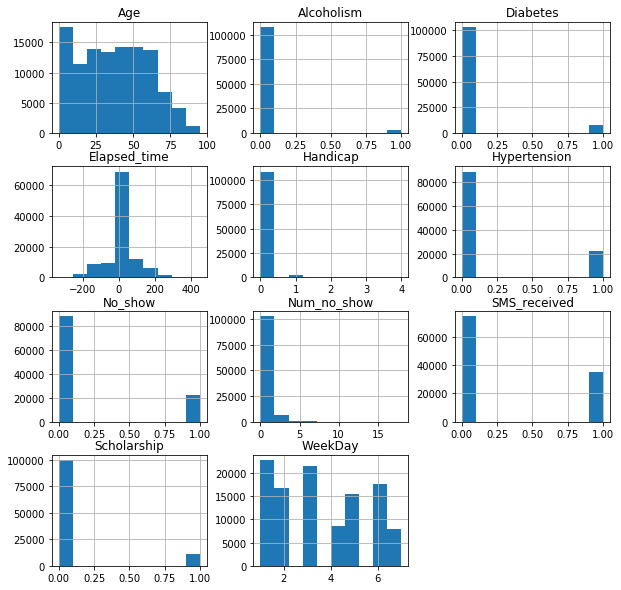

In [27]:
df.hist(figsize=(10,10));

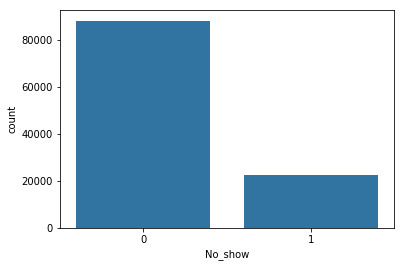

In [28]:
base_color = sb.color_palette()[0]

sb.countplot(x='No_show', data=df, color = base_color)

20 percent of the patients did not show up to their appointment.

#### Create masks for the rows where patients did not show and the rows where they showed.

In [29]:
not_showed = df.No_show == True
showed = df.No_show == False

In [30]:
df.Age[showed].mean()

37.763757825968604

In [31]:
df.Age[not_showed].mean()

34.295580853352455

#### Display the distribution of age for the patients who showed up and did not in the same graph.

In [32]:
# Set the style
sb.set(style="darkgrid")

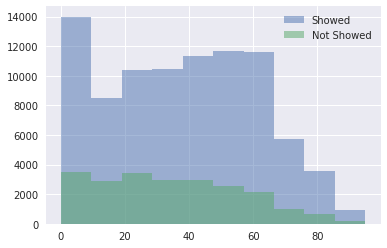

In [33]:
df.Age[showed].hist(alpha=0.5, label = 'Showed');
df.Age[not_showed].hist(alpha=0.5, label = 'Not Showed');
plt.legend();

In each age group the number of the showed patients are much more higher than the unshowed patients.

#### Find the probability of not showing up based on age.

In [34]:
def prob_no_show(dataset, group_by):    
    df = pd.crosstab(index = dataset[group_by], columns = dataset['No_show']).reset_index()
    # calculate probability of not showing up
    df['prob_no_show'] = df[1] / (df[1] + df[0])
    print("The age with the lowest not showing up probability is {} ".format(df['prob_no_show'].idxmin()))
    return df[[group_by, 'prob_no_show']]

#### Display the relationship between Age and Probability of Missing Appointment

The age with the lowest not showing up probability is 88 


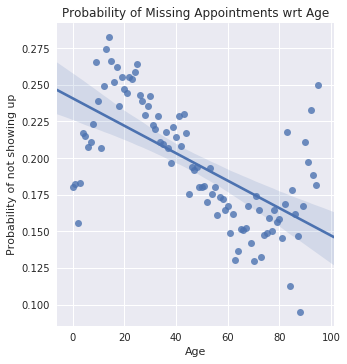

In [35]:
sb.lmplot(data = prob_no_show(df, 'Age'), x = 'Age', y = 'prob_no_show', fit_reg = True);
plt.title('Probability of Missing Appointments wrt Age');
plt.ylabel('Probability of not showing up');

The probability of not showing up is lower around at age 0 and ages between 50 and 100. It is lowest around at 88.

#### Investigate the relationship between showing up and gender.

In [36]:
df.groupby('Gender').No_show.value_counts()


Gender  No_show
F       0          57214
        1          14588
M       0          30954
        1           7724
Name: No_show, dtype: int64

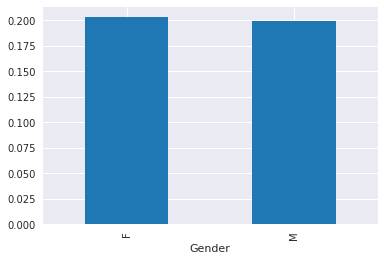

In [37]:
df.groupby('Gender').No_show.mean().plot(kind='bar', color=base_color)


The probability of the women did not show is just a little bit higher than the number of men.

#### Analyze the relationship between recieving SMS and showing up.

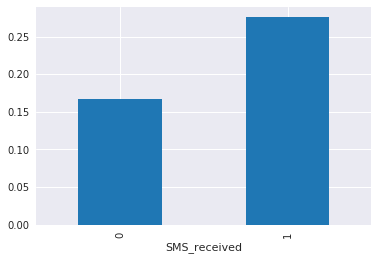

In [38]:
df.groupby('SMS_received').No_show.mean().plot(kind='bar', color=base_color)

Recieving SMS seems to have a negative effect on patients showing up.

#### Analyze the relationship between showing up and the handicap levels.

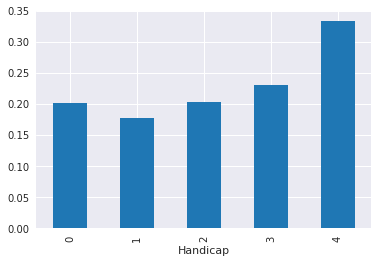

In [39]:
df.groupby('Handicap').No_show.mean().plot(kind='bar', color=base_color)

#### Investigate how enrolling in Bolsa Familia program affects showing up behavior.

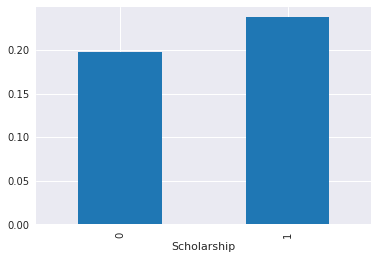

In [40]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar', color=base_color)

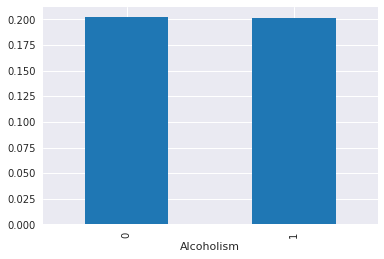

In [41]:
df.groupby('Alcoholism').No_show.mean().plot(kind='bar', color=base_color)

#### Investigate how holding scholarship affects showing up behavior regarding gender.

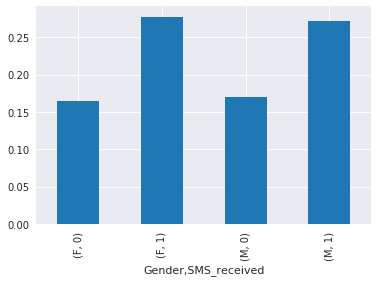

In [42]:
df.groupby(['Gender', 'SMS_received']).No_show.mean().plot(kind='bar', color=base_color)


#### Analyze the relationship between the appointment day and the showing up behavior.

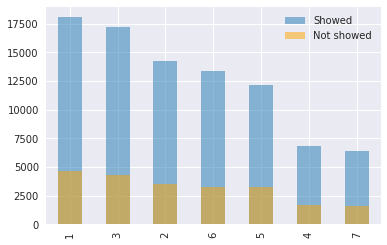

In [43]:
df.WeekDay[showed].value_counts().plot(kind = 'bar', alpha=0.5, color = base_color, label = 'Showed');
df.WeekDay[not_showed].value_counts().plot(kind = 'bar', alpha=0.5,  color = 'orange', label = 'Not showed');
plt.legend();

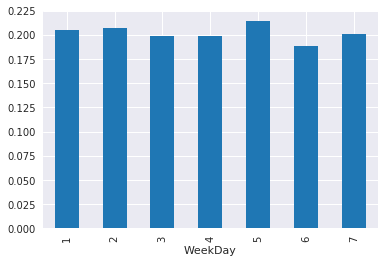

In [44]:
df.groupby('WeekDay').No_show.mean().plot(kind='bar', color=base_color)


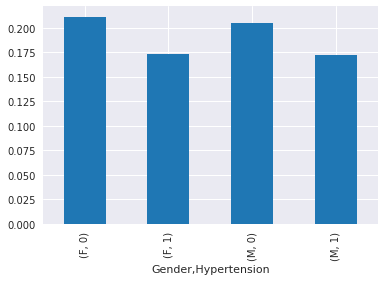

In [45]:
df.groupby(['Gender', 'Hypertension']).No_show.mean().plot(kind='bar', color=base_color)


#### Investigate the relationship between showing up behavior and Diabetes based on gender.

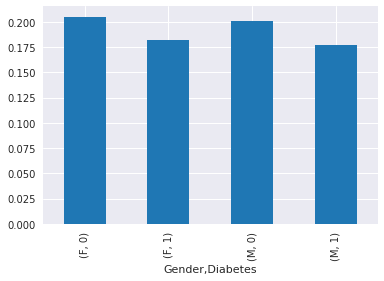

In [46]:
df.groupby(['Gender', 'Diabetes']).No_show.mean().plot(kind='bar', color=base_color)


#### Investigate the relationship between showing up behavior and Alcoholism based on gender

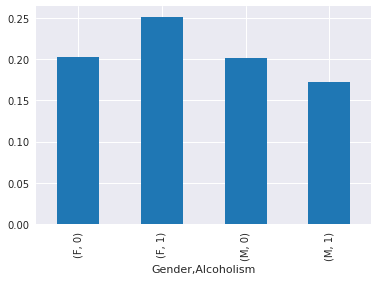

In [47]:
df.groupby(['Gender', 'Alcoholism']).No_show.mean().plot(kind='bar', color=base_color)


Both females and males with hypertension have a higher probability to show up than the patients who do not have hypertension.

The result is very similar to the previous one for the females and males who have diabetes.

Females who have alcholism showed up more than both the females who do not have it and the men in general. On the other hand, probability of men with alcoholism showing up is less than the probability of men.....

### How does the time difference between the scheluded day and appointment day affect the showing up behavior? 

In [48]:
df.query('Elapsed_time < 0')

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WeekDay,Elapsed_time,Num_no_show
68,5.43417573869e+12,5552915,F,2016-06-04,2016-04-29,69,JARDIM DA PENHA,0,1,0,0,0,1,0,5,-36,0
69,793821379148,5552917,F,2016-06-04,2016-04-29,58,SANTO ANDRÉ,0,0,0,0,0,1,0,5,-36,0
70,6.71448948558e+13,5552914,M,2016-06-04,2016-04-29,62,SOLON BORGES,0,0,0,0,0,0,0,5,-36,0
71,1.84631773862e+12,5552936,F,2016-06-04,2016-04-29,30,BONFIM,1,0,0,0,0,1,0,5,-36,0
73,4.54213161295e+13,5552934,F,2016-06-04,2016-04-29,68,REPÚBLICA,0,1,1,0,0,1,0,5,-36,0
97,5.25334248884e+12,5565493,F,2016-11-04,2016-04-29,35,BONFIM,0,0,0,0,0,1,0,5,-189,0
98,3.72596436557e+14,5571906,F,2016-12-04,2016-04-29,51,BONFIM,0,0,0,0,0,1,0,5,-219,0
100,1.66338799399e+14,5574764,F,2016-12-04,2016-04-29,20,BONFIM,0,0,0,0,0,1,0,5,-219,0
109,1.29598834359e+14,5572081,F,2016-12-04,2016-04-29,34,SANTO ANTÔNIO,0,0,0,0,0,1,0,5,-219,0
110,3.73742973241e+12,5574527,F,2016-12-04,2016-04-29,34,SANTO ANTÔNIO,0,0,0,0,0,1,0,5,-219,0


There are too many negavite values in *Elapsed_time* column which does not make sense, because we expect the scheduling day being before appointment day. So, I will drop these negavite values.
There are very high numbers in this column as well. I will drop them, too. Because it does not seem right having that much difference in two dates.

In [49]:
#Drop the rows with the negative values in Elapsed_time
time_between_df = df.drop(df.index[df['Elapsed_time'] < 0])

#Drop the rows with values higher than 100 in Elapsed_time
time_between_df = time_between_df.drop(time_between_df.index[time_between_df['Elapsed_time'] > 100])

time_between_df = time_between_df[['No_show', 'Elapsed_time']].groupby('Elapsed_time').mean()

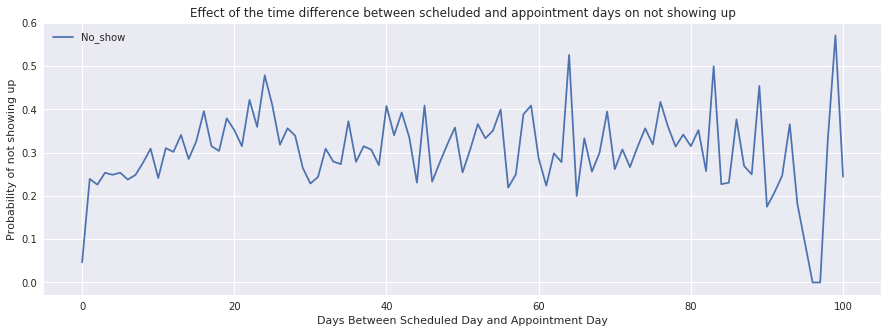

In [50]:
time_between_df.plot(kind='line', figsize=(15,5));
plt.title("Effect of the time difference between scheluded and appointment days on not showing up");
plt.xlabel('Days Between Scheduled Day and Appointment Day');
plt.ylabel('Probability of not showing up');

The probability of not showing is very close to 0 when the day difference is 0. It is getting higher when the difference increases but it is fluctuates mostly between the probability 0.2 & 0.6 and it is even zero when the time difference is close to 100. So there cannot be found a clear analysis but we an infer that when the time difference is close to zero patients do not miss their appointment.

### Research Question 2  (Replace this header name!)

In [51]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!